<a href="https://colab.research.google.com/github/adniaristides/ifood-data-business-analyst-test/blob/master/Case_CRM_iFood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
#importação dos dados
url = "https://raw.githubusercontent.com/adniaristides/ifood-data-business-analyst-test/master/ml_project1_data.csv"

In [4]:
#Organizar em tabela
df = pd.read_csv(url,sep=',')

In [5]:
#Mostrar todas as colunas para as consultas
pd.pandas.set_option('display.max_columns',None)

In [6]:
#Verificando o nome das colunas
print(df.columns.values)

['ID' 'Year_Birth' 'Education' 'Marital_Status' 'Income' 'Kidhome'
 'Teenhome' 'Dt_Customer' 'Recency' 'MntWines' 'MntFruits'
 'MntMeatProducts' 'MntFishProducts' 'MntSweetProducts' 'MntGoldProds'
 'NumDealsPurchases' 'NumWebPurchases' 'NumCatalogPurchases'
 'NumStorePurchases' 'NumWebVisitsMonth' 'AcceptedCmp3' 'AcceptedCmp4'
 'AcceptedCmp5' 'AcceptedCmp1' 'AcceptedCmp2' 'Complain' 'Z_CostContact'
 'Z_Revenue' 'Response']


In [7]:
#Verificando tipo das colunas
print(df.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [8]:
#Verificando valores nulos colunas tipo número
print(df.isna().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [9]:
#Verificando valores nulos colunas tipo texto
print(df.isna().any())

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool


In [11]:
#Apenas a coluna Income tem registros nulos.
print("Qtd registros faltantes {}".format(df[df["Income"].isnull()].shape[0]))
print(df[df["Income"].isnull()])

Qtd registros faltantes 24
         ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
3

In [12]:
#Excluindo registros nulos
df = df.dropna()

Explorando os dados

In [13]:
#verificando dados estatisticos
print(df.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000  

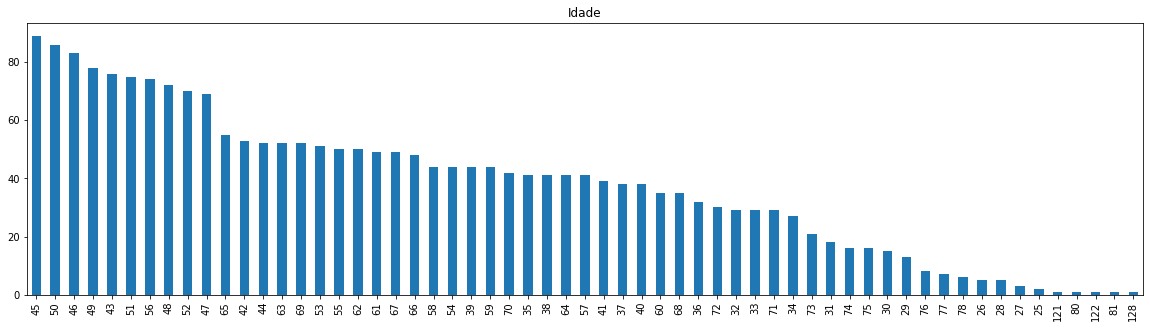

In [19]:
#Caracteristicas dos clientes
df['Idade'] = df['Year_Birth'].apply(lambda x: int(datetime.today().year) - x)
df['ano_inscricao'] = df['Dt_Customer'].apply(lambda x: str(x)[:4]).astype(int)
qtd_clientes = df['ID'].count()

df['Idade'].value_counts().plot(kind='bar', figsize=(20,5))
plt.title("Idade")
plt.show()

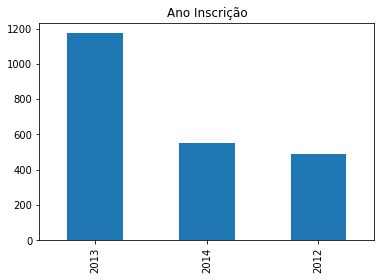

In [20]:
df['ano_inscricao'].value_counts().plot(kind='bar')
plt.title("Ano Inscrição")
plt.show()

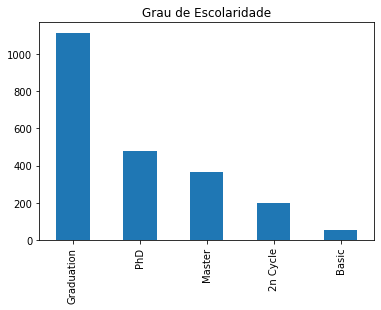

In [21]:
df['Education'].value_counts().plot(kind='bar')
plt.title("Grau de Escolaridade")
plt.show()

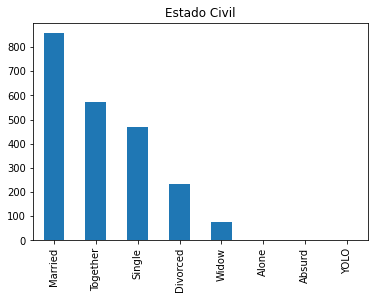

In [22]:
df['Marital_Status'].value_counts().plot(kind='bar')
plt.title("Estado Civil")
plt.show()

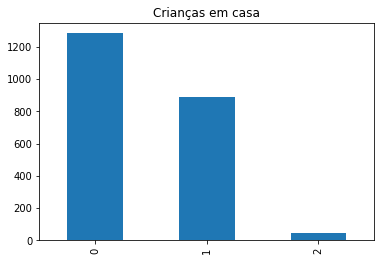

In [23]:
df['Kidhome'].value_counts().plot(kind='bar')
plt.title("Crianças em casa")
plt.show()

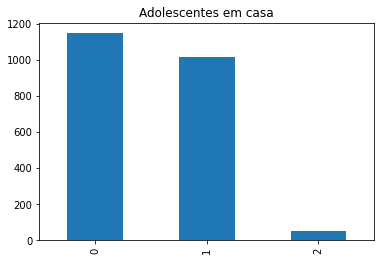

In [24]:
df['Teenhome'].value_counts().plot(kind='bar')
plt.title("Adolescentes em casa")
plt.show()

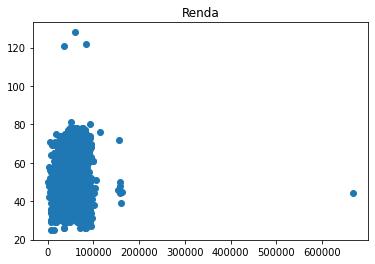

In [25]:
plt.scatter(df.Income,df.Idade)
plt.title("Renda")
plt.show()

In [26]:
tabkid = pd.crosstab(df.Marital_Status,df.Kidhome,margins=True, values=df.Kidhome,aggfunc='count')
print(tabkid)

Kidhome              0      1     2   All
Marital_Status                           
Absurd             2.0    NaN   NaN     2
Alone              NaN    3.0   NaN     3
Divorced         140.0   88.0   4.0   232
Married          488.0  349.0  20.0   857
Single           266.0  195.0  10.0   471
Together         327.0  234.0  12.0   573
Widow             58.0   18.0   NaN    76
YOLO               2.0    NaN   NaN     2
All             1283.0  887.0  46.0  2216


In [27]:
tabteen= pd.crosstab(df.Marital_Status,df.Teenhome,margins=True, values=df.Teenhome,aggfunc='count')
print(tabteen)

Teenhome             0       1     2   All
Marital_Status                            
Absurd             2.0     NaN   NaN     2
Alone              1.0     2.0   NaN     3
Divorced         101.0   125.0   6.0   232
Married          441.0   394.0  22.0   857
Single           291.0   171.0   9.0   471
Together         283.0   277.0  13.0   573
Widow             28.0    47.0   1.0    76
YOLO               NaN     2.0   NaN     2
All             1147.0  1018.0  51.0  2216


In [65]:
tabfam= pd.crosstab(df.Marital_Status,[df.Teenhome,df.Kidhome],margins=True, values=df.ID,aggfunc='count')
print(tabfam)

Teenhome            0                   1                  2         All
Kidhome             0      1     2      0      1     2     0     1      
Marital_Status                                                          
Absurd            2.0    NaN   NaN    NaN    NaN   NaN   NaN   NaN     2
Alone             NaN    1.0   NaN    NaN    2.0   NaN   NaN   NaN     3
Divorced         56.0   41.0   1.0   78.0   44.0   3.0   4.0   2.0   229
Married         227.0  202.0  10.0  242.0  141.0  10.0  16.0   6.0   854
Single          165.0  122.0   3.0   97.0   66.0   7.0   2.0   7.0   469
Together        149.0  126.0   3.0  168.0   99.0   9.0   7.0   6.0   567
Widow            26.0    2.0   NaN   31.0   16.0   NaN   1.0   NaN    76
YOLO              NaN    NaN   NaN    2.0    NaN   NaN   NaN   NaN     2
All             625.0  494.0  17.0  618.0  368.0  29.0  30.0  21.0  2202


In [72]:
tabinc= pd.crosstab(df.Marital_Status,[df.Teenhome,df.Kidhome],margins=True, values=df.Income,aggfunc='mean')
print(tabinc)

Teenhome                   0                                         1  \
Kidhome                    0             1             2             0   
Marital_Status                                                           
Absurd          72365.500000           NaN           NaN           NaN   
Alone                    NaN  34176.000000           NaN           NaN   
Divorced        62512.017857  32624.121951  36627.000000  60102.051282   
Married         63579.370044  34193.128713  35456.400000  58632.115702   
Single          65669.606061  31948.991803  33342.000000  56307.216495   
Together        66983.577181  33501.412698  32248.333333  56856.267857   
Widow           63978.384615  38782.000000           NaN  56596.967742   
YOLO                     NaN           NaN           NaN  48432.000000   
All             64891.835200  33350.801619  34586.000000  57834.878641   

Teenhome                                               2                \
Kidhome                    1         

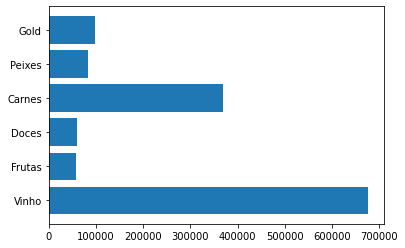

In [28]:
 #Categorias

t_wine = df['MntWines'].sum()
t_frut = df['MntFruits'].sum()
t_meat = df['MntMeatProducts'].sum()
t_fish = df['MntFishProducts'].sum()
t_sweet = df['MntSweetProducts'].sum()
t_gold = df['MntGoldProds'].sum()

x_c = ['Vinho','Frutas','Doces','Carnes', 'Peixes','Gold']
y_c = [t_wine,t_frut,t_sweet,t_meat,t_fish,t_gold]

plt.barh(x_c,y_c)
plt.show()


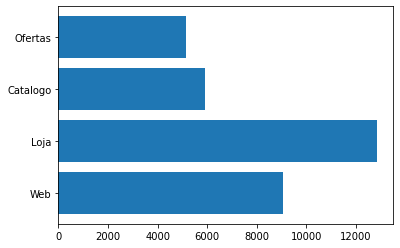

In [29]:
 #Canais de Compra

t_web = df['NumWebPurchases'].sum()
t_cat = df['NumCatalogPurchases'].sum()
t_sto = df['NumStorePurchases'].sum()
t_deal = df['NumDealsPurchases'].sum()

x_cc = ['Web','Loja','Catalogo','Ofertas']
y_cc = [t_web,t_sto,t_cat,t_deal]

plt.barh(x_cc,y_cc)
plt.show()


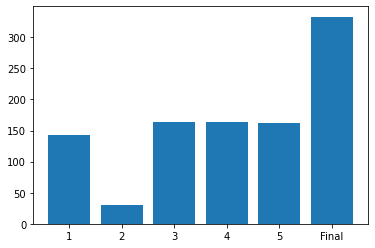

In [31]:
#Campanha

t_cmp1 = df['AcceptedCmp1'].sum()
t_cmp2 = df['AcceptedCmp2'].sum()
t_cmp3 = df['AcceptedCmp3'].sum()
t_cmp4 = df['AcceptedCmp4'].sum()
t_cmp5 = df['AcceptedCmp5'].sum()
t_cmplast = df['Response'].sum()

x_cmp = ['1','2','3','4','5','Final']
y_cmp = [t_cmp1,t_cmp2,t_cmp3,t_cmp4,t_cmp5,t_cmplast]

plt.bar(x_cmp,y_cmp)
plt.show()

Tratando Outliers

In [32]:
#Calculo média e desvio padrão para Idade
mean = np.mean(df.Idade, axis=0).__int__()
sd = np.std(df.Idade, axis=0).__int__()
lim_inf = mean - 3 * sd
lim_sup = mean + 3 * sd

In [33]:
#Listando Valores Inferiores
print("Limite inferior {}".format(lim_inf))
for x in df.Idade:
    if(x < lim_inf): print (x)

Limite inferior 19


In [34]:
#Listando Valores Superiores
print("Limite superior {}".format(lim_sup))
for x in df.Idade:
    if(x > lim_sup): print(df.index[df["Idade"] == x])

Limite superior 85
Int64Index([192], dtype='int64')
Int64Index([239], dtype='int64')
Int64Index([339], dtype='int64')


In [35]:
#excluindo linhas com outliers
df = df.drop(labels=[339,239,192],axis=0) 

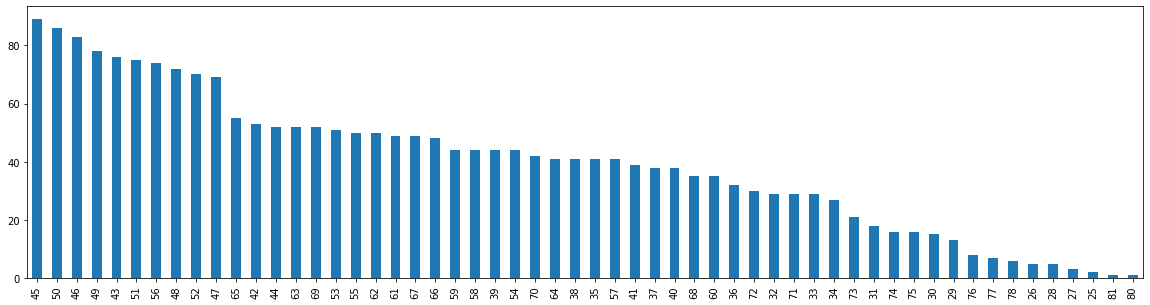

In [38]:
df['Idade'].value_counts().plot(kind='bar',figsize=(20,5))
plt.show()

In [39]:
#Calculo média e desvio padrão para Income
mean = np.mean(df.Income, axis=0).__int__()
sd = np.std(df.Income, axis=0).__int__()
lim_inf_in = mean - 2 * sd
lim_sup_in = mean + 2 * sd

In [40]:
#Listando Valores Inferiores
print("Limite inferior {}".format(lim_inf_in))
for x in df.Income:
    if(x < lim_inf_in): print (x)

Limite inferior 1892
1730.0


In [41]:
#Listando Valores Superiores
print("Limite superior {}".format(lim_sup_in))
for x in df.Income:
    if(x > lim_sup_in): print(df.index[df["Income"] == x])

Limite superior 102580
Int64Index([164], dtype='int64')
Int64Index([252], dtype='int64')
Int64Index([617], dtype='int64')
Int64Index([646], dtype='int64')
Int64Index([655], dtype='int64')
Int64Index([687], dtype='int64')
Int64Index([1300], dtype='int64')
Int64Index([1653], dtype='int64')
Int64Index([1898], dtype='int64')
Int64Index([2132], dtype='int64')
Int64Index([2233], dtype='int64')


In [42]:
#excluindo linhas com outliers
df = df.drop(labels=[164,252,617,646,655,687,1300,1653,1898,2132,2233],axis=0) 

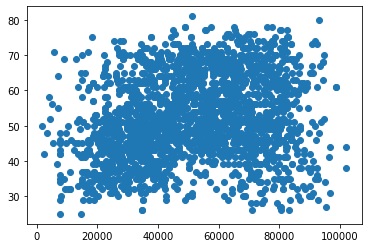

In [43]:
plt.scatter(df.Income,df.Idade)
plt.show()

Correlações

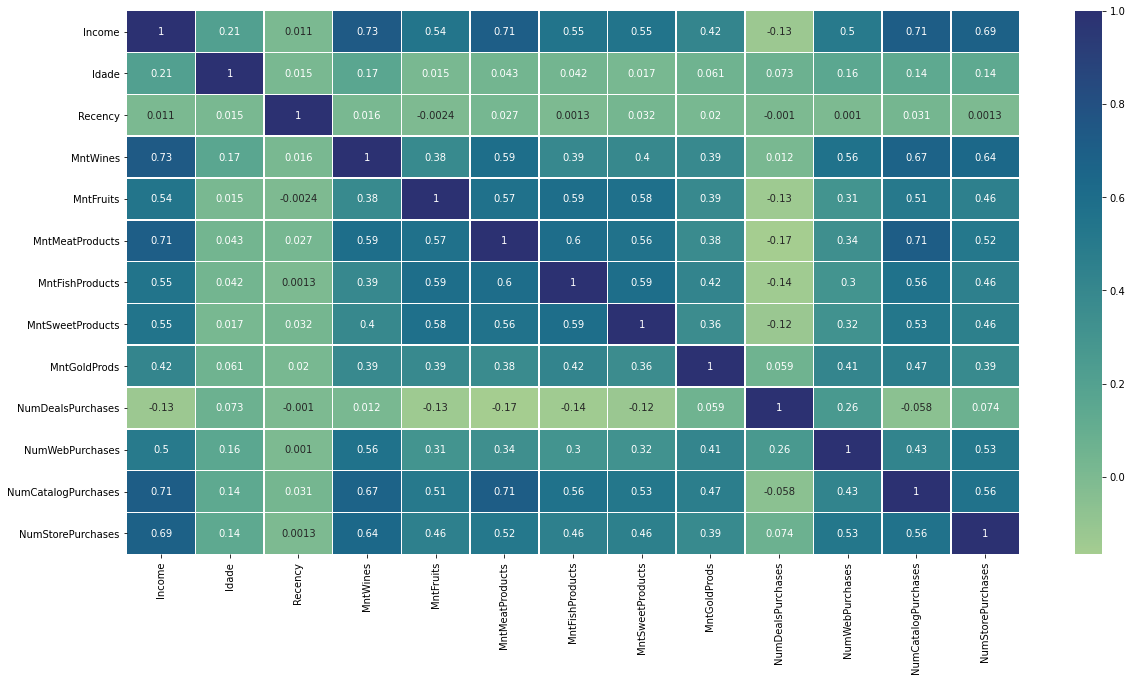

In [45]:
#Correlacionando as variaveis (idade,income, canais de compra, categorias)
df_correl = df.iloc[:,[4,29,8,9,10,11,12,13,14,15,16,17,18]]
plt.figure(figsize=(20,10))
sns.heatmap(df_correl.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()

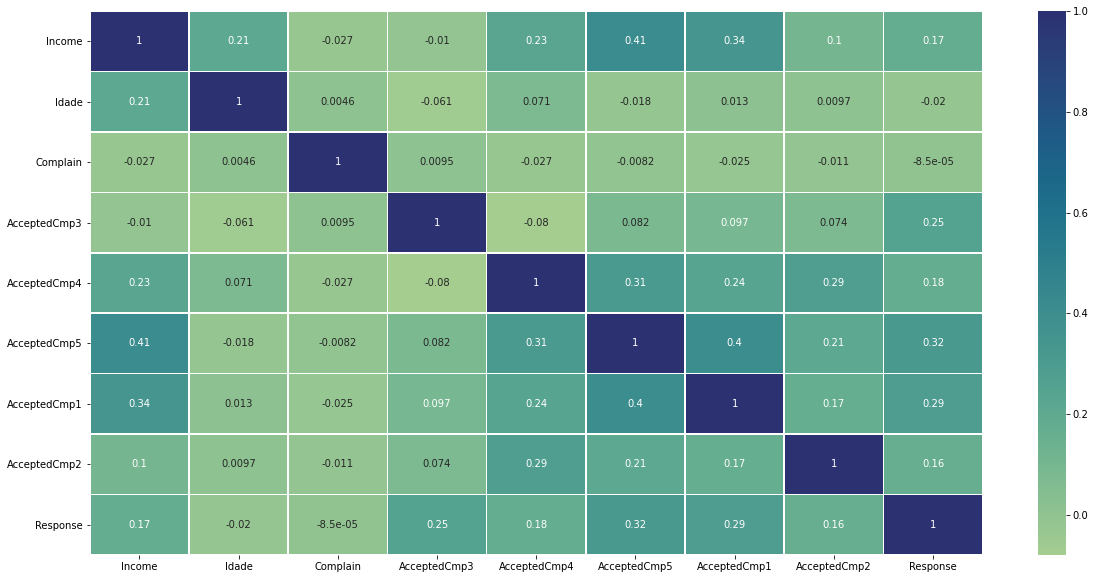

In [46]:
#Correlacionando as variaveis (idade,income,reclamações,campanhas)
df_correl2 = df.iloc[:,[4,29,25,20,21,22,23,24,28]]
plt.figure(figsize=(20,10))
sns.heatmap(df_correl2.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()

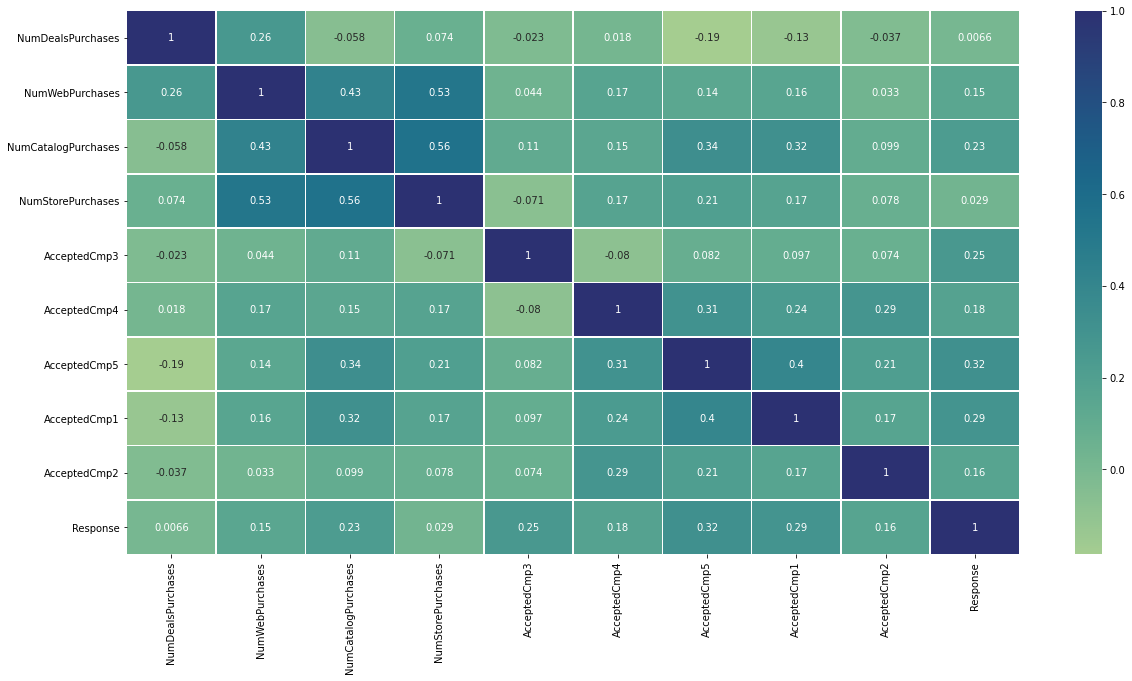

In [47]:
#Correlacionando as variaveis (campanhas,canais de compras)
df_correl3 = df.iloc[:,[15,16,17,18,20,21,22,23,24,28]]
plt.figure(figsize=(20,10))
sns.heatmap(df_correl3.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()

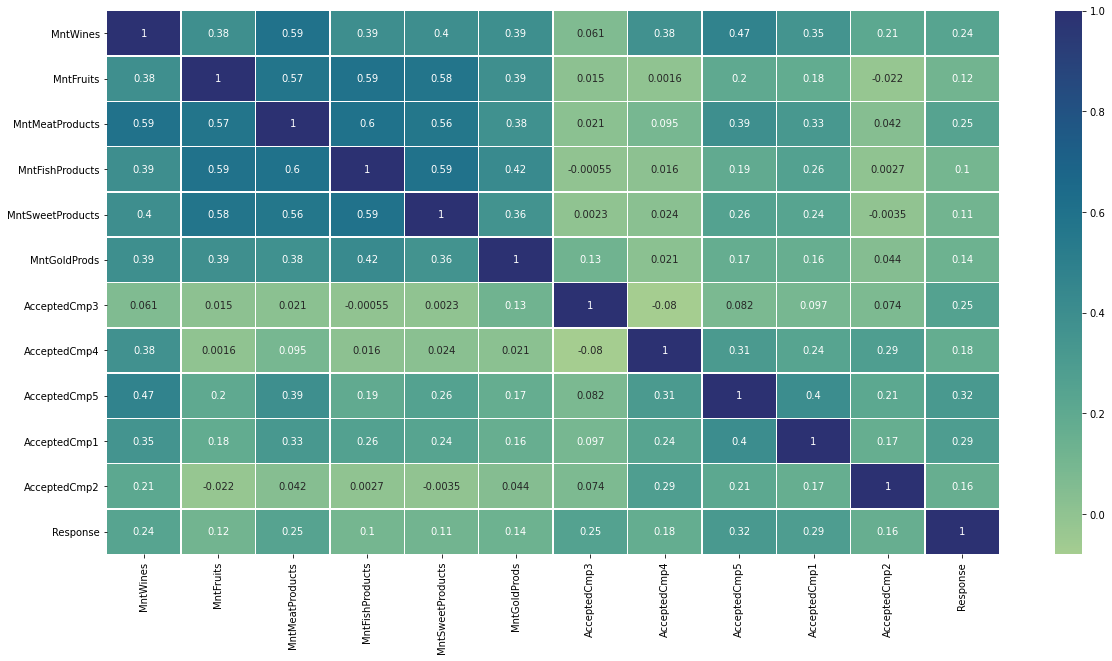

In [48]:
#Correlacionando as variaveis (campanhas,categorias)
df_correl3 = df.iloc[:,[9,10,11,12,13,14,20,21,22,23,24,28]]
plt.figure(figsize=(20,10))
sns.heatmap(df_correl3.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()

Seguimentação dos Clientes

In [49]:
#Criando um Score para categorizar os clientes por total gasto com compras
total = t_wine + t_frut + t_meat + t_fish + t_gold + t_sweet #valor total ganho em 2 anos
media = int(total/qtd_clientes) #valor total dividido por total de clientes
df['score'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + \
               df['MntSweetProducts'] + df['MntGoldProds']

calc1 = int(0.2 * media) #20% do valor médio
calc2 = int(0.7 * media) #70% do valor médio

df.loc[df.score<=calc1,'score']= 1 #cliente terá score 1 quando a soma das compras totalizar até 20% do valor médio
df.loc[(df.score>calc1) & (df.score<=calc2),'score']= 2  #cliente terá score 2 quando a soma das compras totalizar mais que 20% e menos que 70% do valor médio
df.loc[df.score>calc2,'score']= 3  #cliente terá score 3 quando a soma das compras totalizar mais que 70% do valor médio


In [52]:
#Agrupando clientes por score e por aceite em cada campanha
df['cpm_aceite'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

print(df.groupby('score')['cpm_aceite'].sum())

score
1    123
2     85
3    777
Name: cpm_aceite, dtype: int64


In [53]:
#Agrupando clientes por score e por categoria

print(df.groupby('score')['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'].sum())

       MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
score                                                          
1         13951       2432             9173             3571   
2         52236       4372            23006             6070   
3        607723      51084           331783            73377   

       MntSweetProducts  MntGoldProds  
score                                  
1                  2558          7638  
2                  3928         12353  
3                 52877         76797  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
#Agrupando clientes por score e por canal de compra

print(df.groupby('score')['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases'].sum())

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
score                                                            
1                 1202                  232               2124   
2                 1583                  531               1859   
3                 6215                 5053               8832   

       NumDealsPurchases  
score                     
1                   1342  
2                   1193  
3                   2576  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


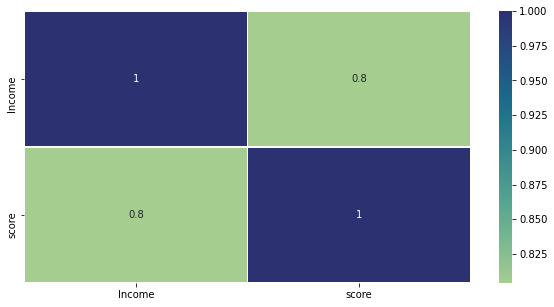

In [149]:
#Avaliando correlação score e income
df2 = df.iloc[:,[4,31]]
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()

Modelo Preditivo
 ---
Acreditamos que o sucesso para a proxima campanha se dará com a abordagem
ocorrendo pelos canais de compra. Por esse motivo, o modelo preditivo aqui estudado visa verificar, com base na categoria de produto, qual canal de compra deverá receber a campanha.

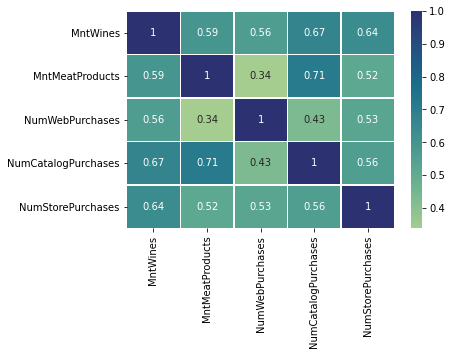

In [129]:
#Avaliando correlação
df2 = df.iloc[:,[9,11,16,17,18]]
plt.figure()
sns.heatmap(df2.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()

In [138]:
#treinando modelo para compras via loja
X = df['NumCatalogPurchases'].values.reshape(-1,1)
y = df['MntMeatProducts'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

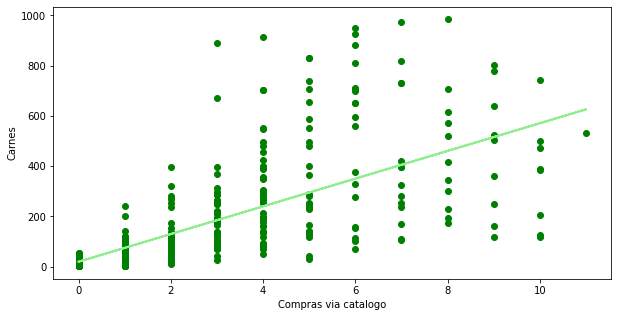

In [139]:
plt.figure(figsize=(10,5))
y_pred = regressor.predict(X_test)
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='lightgreen', linewidth=2)
plt.xlabel('Compras via catalogo')
plt.ylabel('Carnes')
plt.show()

In [94]:
#Coeficiente de determinação
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred)) 

0.5074771455135314
